In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
%pwd
%cd ..

/Users/ENZO/KOOKIZ/GITHUB/translate-handsign


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
actions = ['가래', '기침', '불안', '아프다', '열', '이상하다', '충혈된 눈', '코막힘', '콧물']
time_num, time_num1, time_num2 = '1744771126','1744771199', '1744771241'
for i in time_num:
    data = np.concatenate([
        # np.load(f'dataset/seq_가래_{time_num}.npy'),
        # np.load(f'dataset/seq_기침_{time_num}.npy'),
        # np.load(f'dataset/seq_불안_{time_num}.npy'),
        np.load(f'dataset/seq_아프다_{time_num}.npy'),
        np.load(f'dataset/seq_열_{time_num}.npy'),
        # np.load(f'dataset/seq_이상하다_{time_num}.npy'),
        # np.load(f'dataset/seq_충혈된_눈_{time_num}.npy'),
        # np.load(f'dataset/seq_코막힘_{time_num}.npy'),
        # np.load(f'dataset/seq_콧물_{time_num}.npy'),
        # np.load(f'dataset/seq_가래_{time_num1}.npy'),
        # np.load(f'dataset/seq_기침_{time_num1}.npy'),
        # np.load(f'dataset/seq_불안_{time_num1}.npy'),
        np.load(f'dataset/seq_아프다_{time_num1}.npy'),
        np.load(f'dataset/seq_열_{time_num1}.npy'),
        # np.load(f'dataset/seq_이상하다_{time_num1}.npy'),
        # np.load(f'dataset/seq_충혈된_눈_{time_num1}.npy'),
        # np.load(f'dataset/seq_코막힘_{time_num1}.npy'),
        # np.load(f'dataset/seq_콧물_{time_num1}.npy'),
        # np.load(f'dataset/seq_가래_{time_num2}.npy'),
        # np.load(f'dataset/seq_기침_{time_num2}.npy'),
        # np.load(f'dataset/seq_불안_{time_num2}.npy'),
        np.load(f'dataset/seq_아프다_{time_num2}.npy'),
        np.load(f'dataset/seq_열_{time_num2}.npy')
        # np.load(f'dataset/seq_이상하다_{time_num2}.npy'),
        # np.load(f'dataset/seq_충혈된_눈_{time_num2}.npy'),
        # np.load(f'dataset/seq_코막힘_{time_num2}.npy'),
        # np.load(f'dataset/seq_콧물_{time_num2}.npy')
    ], axis=0)

data.shape

(291, 10, 56)

In [6]:
print(np.load(f'dataset/seq_아프다_1744771126.npy').shape)
print(np.load(f'dataset/seq_열_1744771126.npy').shape)

(40, 10, 56)
(57, 10, 56)


In [7]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(291, 10, 55)
(291,)


In [8]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [9]:
len(labels)

291

In [10]:
np.unique(labels)

array([0., 1.])

In [11]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(291, 9)

In [12]:
y_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [13]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2020)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(232, 10, 55) (232, 9)
(59, 10, 55) (59, 9)


In [14]:
x_train.shape[1:3]

(10, 55)

In [15]:
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [16]:
# custom f1 score
def metric_F1score(y_true,y_pred): 
    TP=tf.reduce_sum(y_true*tf.round(y_pred))
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    F1score=2*precision*recall/(precision+recall)
    return F1score

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow.keras as keras

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(len(actions), activation='softmax', kernel_regularizer=keras.regularizers.l2(0.01))
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',metric_F1score])
model.summary()

/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        30,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,097 (129.29 KB)

 Trainable params: 33,097 (129.29 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_metric_F1score', min_delta = 0, patience = 20, mode = 'max')


history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/multi_hand_gesture_classifier.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_metric_F1score', factor=0.5, patience=50, verbose=1, mode='auto'),
        early_stopping
    ]
)

Epoch 1/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.3750 - loss: 5.9375 - metric_f1score: 0.3934
Epoch 1: val_acc improved from -inf to 0.94915, saving model to models/multi_hand_gesture_classifier.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.5342 - loss: 4.5610 - metric_f1score: 0.5361 - val_acc: 0.9492 - val_loss: 1.6811 - val_metric_f1score: 0.9561 - learning_rate: 0.0010
Epoch 2/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.7188 - loss: 3.5114 - metric_f1score: 0.7097
Epoch 2: val_acc improved from 0.94915 to 0.96610, saving model to models/multi_hand_gesture_classifier.h5


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_metric_F1score` which is not available. Available metrics are: acc,loss,metric_f1score,val_acc,val_loss,val_metric_f1score,learning_rate
  current = self.get_monitor_value(logs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.7384 - loss: 2.9155 - metric_f1score: 0.7460 - val_acc: 0.9661 - val_loss: 1.5477 - val_metric_f1score: 0.9561 - learning_rate: 0.0010
Epoch 3/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9062 - loss: 1.9435 - metric_f1score: 0.9032
Epoch 3: val_acc did not improve from 0.96610
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.8110 - loss: 2.1518 - metric_f1score: 0.8199 - val_acc: 0.9661 - val_loss: 1.3650 - val_metric_f1score: 0.9826 - learning_rate: 0.0010
Epoch 4/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9375 - loss: 1.6318 - metric_f1score: 0.9375
Epoch 4: val_acc improved from 0.96610 to 1.00000, saving model to models/multi_hand_gesture_classifier.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9180 - loss: 1.6283 - metric_f1score: 0.9211 - val_acc: 1.0000 - val_loss: 1.2963 - val_metric_f1score: 1.0000 - learning_rate: 0.0010
Epoch 5/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.8125 - loss: 2.3577 - metric_f1score: 0.7937
Epoch 5: val_acc did not improve from 1.00000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8625 - loss: 1.8375 - metric_f1score: 0.8594 - val_acc: 1.0000 - val_loss: 1.2661 - val_metric_f1score: 1.0000 - learning_rate: 0.0010
Epoch 6/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9688 - loss: 1.6439 - metric_f1score: 0.9688
Epoch 6: val_acc did not improve from 1.00000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.9265 - loss: 1.6413 - metric_f1score: 0.9337 - val_acc: 1.0000 - val_loss: 1.2362 - val_metric_f1score: 1.0000 - learning_rate: 0.0010
Epoch 7/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9688 - loss: 1.3399 - metric_f1score: 0.9524
Epoch 7: val_acc did not improve from 1.00000
8/8 ━━

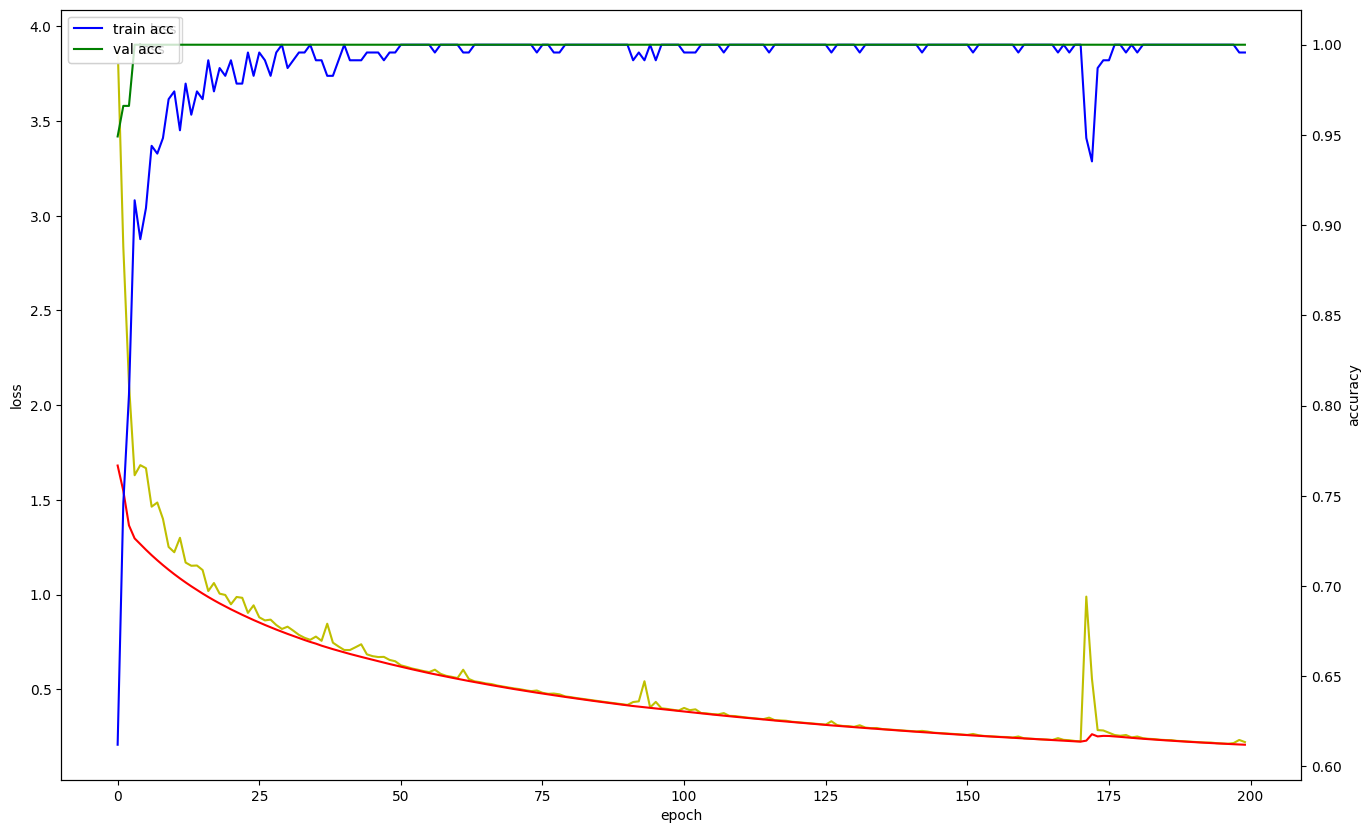

In [20]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

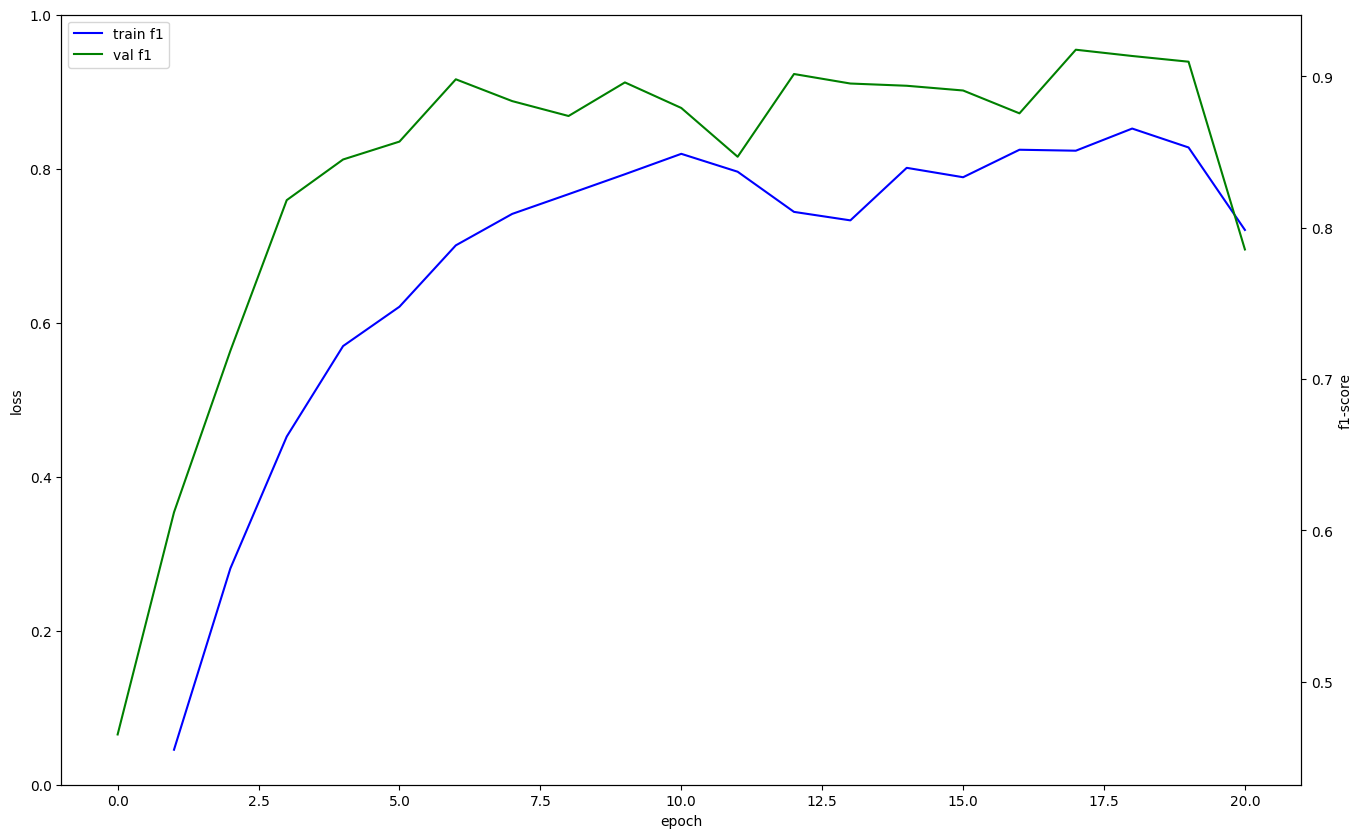

In [24]:
fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.plot(history.history['metric_F1score'], 'b', label='train f1')
acc_ax.plot(history.history['val_metric_F1score'], 'g', label='val f1')
acc_ax.set_ylabel('f1-score')
acc_ax.legend(loc='upper left')

plt.show()

In [21]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/multi_hand_gesture_classifier.h5', custom_objects = {'metric_F1score':metric_F1score})

y_pred = model.predict(x_val)
multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[[32,  0],
        [ 0, 27]],

       [[27,  0],
        [ 0, 32]]])

In [22]:
multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[32,  0],
        [ 0, 27]],

       [[27,  0],
        [ 0, 32]]])

In [23]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/multi_hand_gesture_classifier.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[[32,  0],
        [ 0, 27]],

       [[27,  0],
        [ 0, 32]]])

In [26]:
import tensorflow as tf
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# 1. TF Lite 기본 연산 + Select TF ops 사용
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]

# 2. TensorList lowering 비활성화
converter._experimental_lower_tensor_list_ops = False

# 변환 실행
tflite_model = converter.convert()

# 모델 저장
with open('models/multi_hand_gesture_classifier.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpxfbzlnaa/assets


INFO:tensorflow:Assets written to: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpxfbzlnaa/assets


Saved artifact at '/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpxfbzlnaa'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10, 55), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  13077131536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13077172240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13077133472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13077305248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13077302256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13077314752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13077314048: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1744771471.662788 7613607 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1744771471.662803 7613607 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-16 11:44:31.662948: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpxfbzlnaa
2025-04-16 11:44:31.663471: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-16 11:44:31.663479: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpxfbzlnaa
2025-04-16 11:44:31.668844: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-16 11:44:31.694844: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpxfbzlnaa
2025-04-16 11:44:31.705430: I tensorflow/cc/saved_model/loader.cc: